# New York City Airbnb Analysis and Price Prediction

Vatsal Agarwal, Varun Singhai, Raymond Zou<br>


## Table of Contents

1. [Introduction](#Introduction) <br>
2. [Data Curation, Parsing, and Management](#2) <br>
    2.1 [Imports](#2.1) <br>
    2.2 [Loading in the Data](#2.2) <br>
    2.3 [Tidy Data](#2.3) <br>
3. [Exploratory Data Analysis (EDA)](#3) <br>
    3.1 [Imports](#3.1) <br>
    3.2 [Listing Location Visualization](#3.2) <br>
    3.3 [Listing Prices by Borough](#3.3) <br>
    3.4 [Number of Reviews and Price Analysis](#3.4) <br>
    3.5 [Most Popular Neighbourhoods Analysis](#3.5) <br>
    3.6 [EDA Conclusions](#3.6) <br>
4. [Hypothesis Testing](#4) <br>
    4.1 [Null v. Alternative Hypothesis](#4.1) <br>
    4.2 [Hypothesis Testing Conclusions](#4.2) <br>
5. [Machine Learning](#5) <br>
    5.1 [Imports](#5.1) <br>
    5.2 [Data Preparation](#5.2)<br>
    5.3 [Distribution of Listing Prices](#5.3) <br>
    5.4 [Data Processing](#5.4) <br>
    5.5 [Machine Learning Models](#5.5) <br>
6. [Conclusion](#6) <br>

## 1. Introduction
New York City is the city that never sleeps. It is one of the most popular cities in the world and attracts tens of millions of visitors every year. A popular lodging alternative to hotels is Airbnb where city locals can offer there homes for visitors to stay in. The price of an Airbnb per night can vary based on many factors like it's location, room type (entire home/apt, private room, etc.), reviews, and availability. We want to explore the question if we can predict the price of Airbnbs in New York City based on these factors using data science and machine learning methods.

![title](nyc3.png)

<a id=2></a>
## 2. Data Curation, Parsing, and Management
The first step in the data science pipeline is obtaining data and making sure that it is in a usuable form for analysis, visualization, and modeling.

<a id=2.1></a>
### 2.1 Imports

In [10]:
import pandas as pd 

For this section we will be using the `pandas` library so that we can put our data into a dataframe format. The easiest way to install pandas is as part of the <a href='https://docs.continuum.io/anaconda/'>Anaconda</a> distribution.

<a id=2.2></a>
### 2.2 Loading in the Data
The data we will be using is the "New York City Airbnb Open Data" from 2019 which can be found [here](https://www.kaggle.com/dgomonov/new-york-city-airbnb-open-data). The data is downloaded as a csv file which can be imported into our pipeline as a pandas dataframe.

In [8]:
# Import data from csv file to dataframe
data = pd.read_csv('AB_NYC_2019.csv')
data.head()

id                                              name  host_id  \
0  2539                Clean & quiet apt home by the park     2787   
1  2595                             Skylit Midtown Castle     2845   
2  3647               THE VILLAGE OF HARLEM....NEW YORK !     4632   
3  3831                   Cozy Entire Floor of Brownstone     4869   
4  5022  Entire Apt: Spacious Studio/Loft by central park     7192   

     host_name neighbourhood_group neighbourhood  latitude  longitude  \
0         John            Brooklyn    Kensington  40.64749  -73.97237   
1     Jennifer           Manhattan       Midtown  40.75362  -73.98377   
2    Elisabeth           Manhattan        Harlem  40.80902  -73.94190   
3  LisaRoxanne            Brooklyn  Clinton Hill  40.68514  -73.95976   
4        Laura           Manhattan   East Harlem  40.79851  -73.94399   

         room_type  price  minimum_nights  number_of_reviews last_review  \
0     Private room    149               1                  9  2018-10-19   
1  Entire home/apt    225               1                 45  2019-05-21   
2     Private room    150               3                  0         NaN   
3  Entire home/apt     89               1                270  2019-07-05   
4  Entire home/apt     80              10                  9  2018-11-19   

   reviews_per_month  calculated_host_listings_count  availability_365  
0               0.21                               6               365  
1               0.38                               2               355  
2                NaN                               1               365  
3               4.64                               1               194  
4               0.10                               1                 0

<a id=2.3></a>
### 2.3 Tidy Data
The next step is to make sure the data is in a form that is organized and easy to use. We follow the model for tidy data where:

1. Each attribute (or variable) forms a column
2. Each entity (or observation) forms a row
3. Each type of entity (observational unit) forms a table

To make sure our data follows the tidy model, we clean the data so that each column (attribute) has its own uniform format and units for each row. As an example we must make sure that the price for each row is in the same units (US dollars). We must also make sure each row forms an entity. In this case, each row represents an Airbnb listing and the entire table is made up of NYC listings. We also want to drop columns that we will not be using in our analysis and create any new columns based on the existing columns that we may need for our models later on.

For regression, we need to ensure that all inputs are numerical in nature. So for the latest date reviewed, we convert the date to an actual measure of time, in this case the number of days since the last review.

In [9]:
# Drop unused columns
data = data.drop(['id', 'host_id', 'host_name'], axis=1)

# Remove entries that are missing the name attribute
data = data.dropna(subset=['name'])

# Convert the datetime information into a numerical attribute 
# by extracting the number of days since the last review (comparing to the current day)
data['last_review'] = pd.to_datetime(data['last_review'])
today = pd.to_datetime('today')
data['days_since_last_review'] = today - data['last_review']
data['days_since_last_review'] = data['days_since_last_review'].dt.days
data.drop(['last_review'], axis=1, inplace=True)

data.head()

name neighbourhood_group  \
0                Clean & quiet apt home by the park            Brooklyn   
1                             Skylit Midtown Castle           Manhattan   
2               THE VILLAGE OF HARLEM....NEW YORK !           Manhattan   
3                   Cozy Entire Floor of Brownstone            Brooklyn   
4  Entire Apt: Spacious Studio/Loft by central park           Manhattan   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0    Kensington  40.64749  -73.97237     Private room    149               1   
1       Midtown  40.75362  -73.98377  Entire home/apt    225               1   
2        Harlem  40.80902  -73.94190     Private room    150               3   
3  Clinton Hill  40.68514  -73.95976  Entire home/apt     89               1   
4   East Harlem  40.79851  -73.94399  Entire home/apt     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  days_since_last_review  
0               365                   576.0  
1               355                   362.0  
2               365                     NaN  
3               194                   317.0  
4                 0                   545.0

More information about tidy data can be found in Hadley Wickham's paper titled [Tidy Data](http://www.jstatsoft.org/v59/i10/paper)

<a id=3></a>
## 3. Exploratory Data Analysis (EDA)
This section we will take a deep dive into learning how to show patterns, correlations, and visualize our data to the common eye. Creating visually appealing stastics about our data because the raw csv file helps no one and is impossible to understand. Through graphs and plots we will be able to better understand our data and get a true hollistic overview of it.

<a id=3.1></a>
### 3.1 Imports

In [11]:
import numpy as np
import matplotlib.pyplot as plt
from ipyleaflet import Map, Heatmap
import seaborn as sns
from collections import defaultdict, Counter

The main libraries we will use for the data visualization are `matplotlib.pyplot` and `seaborn` as they are both geared towards drawing attractive and visually appealing stastics. While as `ipyleaftlet` will be used as a geographic visualization for our data. Below is how to download the libraries. 

1. <a href='https://matplotlib.org/users/installing.html'>Matplotlib</a>
    * python -m pip install -U pip
    * python -m pip install -U matplotlib
2. <a href='https://seaborn.pydata.org/installing.html'>Seaborn</a> 
    * pip install seaborn
3. <a href='https://ipyleaflet.readthedocs.io/en/latest/installation.html'>ipyleaflet</a>
    * pip install ipyleaflet

<a id=3.2></a>
### 3.2 Listing Location Visualization
Now we will begin looking at our data, but before we do, lets look at where the Airbnb listings are located. Rather than using other means of looking at density, we will be using a heatmap over New York City and have a nice understanding of which borough in NYC has the most amount of listings.

In [12]:
# Grab the latitude and longitude of each listing into the locations list
location = []
for idx, row in data.iterrows():
    location.append([row['latitude'], row['longitude'], 2])

# Create the NYC map using the Map module from the ipyleaflet library
nyc_map = Map(center=(40.75,-74.01), zoom=11)
nyc_map

heatMap = Heatmap(
    locations = location,
    radius =8
)

# Add the heatmap layer onto the map
nyc_map.add_layer(heatMap);
nyc_map

Map(center=[40.75, -74.01], controls=(ZoomControl(options=['position', 'zoom_in_text', 'zoom_in_title', 'zoom_…

This map is not only useful in determing areas with a dense amount of listings (such as areas next to Central Park and the areas around the World Trade Center), but these <i>interactive</i> maps give the user a nice overview of what to expect with the data. Furthermore, this <a href = 'https://ipyleaflet.readthedocs.io/en/latest/index.html'>library</a> is very useful for data that has a geographical aspect to it.

<a id=3.3></a>
### 3.3 Listing Prices by Borough
Now to begin the graphs and plots, I envision myself comparing the boroughs (Manhattan, Brooklyn, Queens, etc.) against each other. So, rather than having multiple if statements to extract the borough I want, I am simply going to split them up in their own respective dataframe using the `loc` method.

In [14]:
# Create a dataframe for each borough  by using the loc method and having a condition within it for which borough
# you want
df_manhattan = data.loc[data['neighbourhood_group'] == "Manhattan"]
df_brooklyn = data.loc[data['neighbourhood_group'] == "Brooklyn"]
df_queens = data.loc[data['neighbourhood_group'] == "Queens"]
df_staten_island = data.loc[data['neighbourhood_group'] == "Staten Island"]
df_bronx = data.loc[data['neighbourhood_group'] == "Bronx"]


Lets compare the distribution of prices for each borough and try to come up with some analysis and a deeper understanding of if there is a change of pricing over each borough.

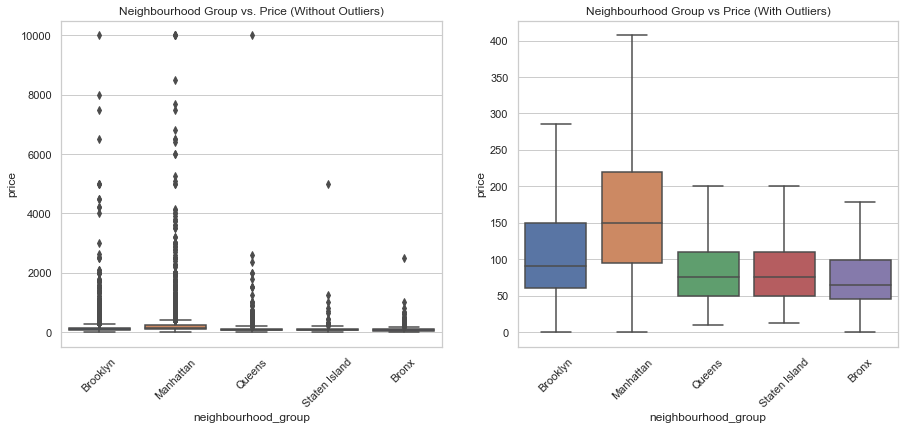

In [16]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,6))
sns.set(style="whitegrid")
bp1 = sns.boxplot(x = 'neighbourhood_group', y = 'price', data = data, ax=ax1)
bp2 = sns.boxplot(x = 'neighbourhood_group', y = 'price', data = data, ax=ax2, showfliers=False)

bp1.set_xticklabels(bp1.get_xticklabels(), rotation=45)
bp1.set_title("Neighbourhood Group vs. Price (Without Outliers)")
bp2.set_xticklabels(bp1.get_xticklabels(), rotation=45)
plt.title("Neighbourhood Group vs Price (With Outliers)")
plt.show()

As you can see, there are two boxplots, one with outliers and one without outliers. I think it is important to show both because it shows the user that there is a very big range of pricing for each borough (which is shown in the boxplot <b>with</b> outliers). But with that said, it is also important to show the user about how the majority of the data looks, which is the boxplot graph <b>without</b> the outliers. 

One thing we can determine about the pricing for each borough is that the Airbnb's in manhattan tend to be more expensive than their counterparts, while as the airbnb's in Bronx seem like the way to go if you want a cheaper option. 

<a id=3.4></a>
### 3.4 Number of Reviews and Price Analysis
The next aspect we are going to look at is the number of reviews, and if that variable affects any of the other varaiables in the dataframe. The first thing we are going to do is take a distribution plot of the number of reviews,  which is a histogram with a density line showing it. One thing we always want to check before drawing plots and graphs is to take a look at the distribution of the variable and understand the range, skew, outliers, etc. This distribution will build us the foundation for all the other graphs and plots we draw for the variable.

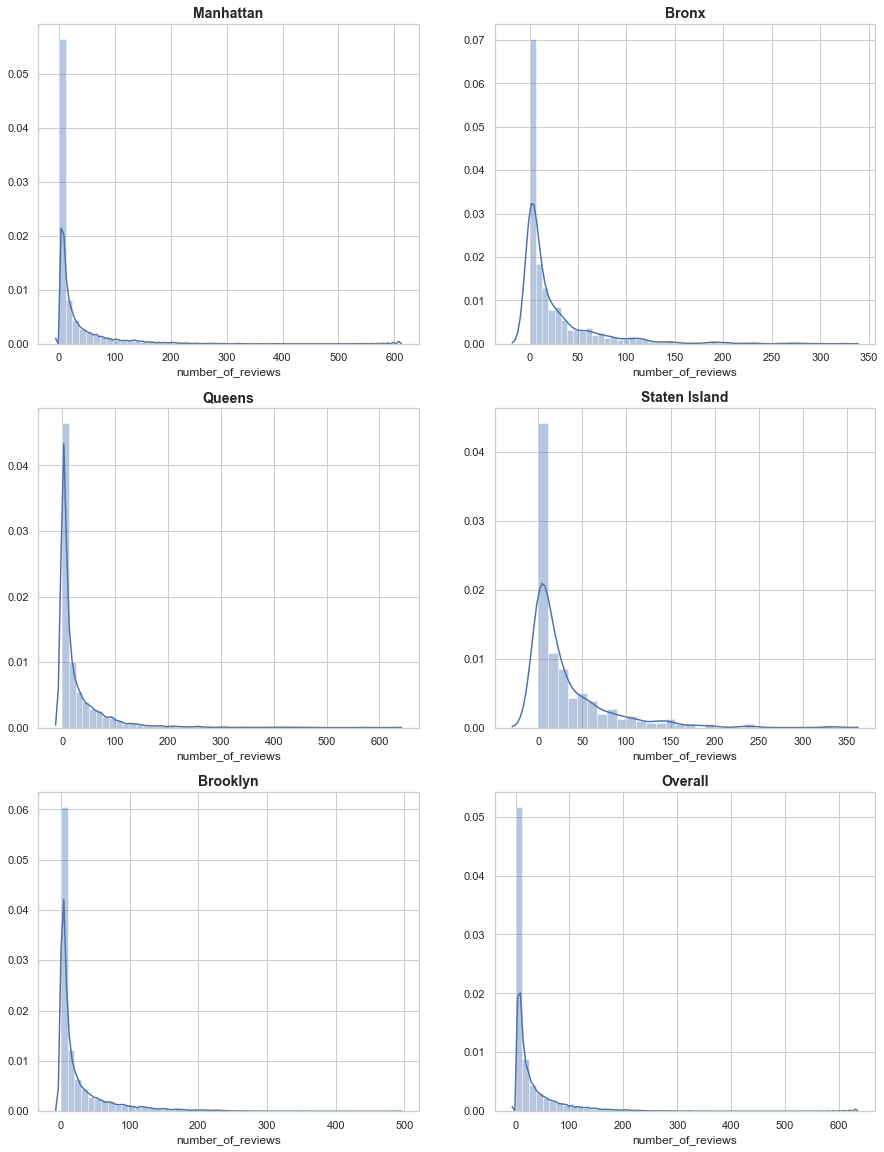

In [18]:
# Create a matrix of subplots, 2x3
fig, ax = plt.subplots(3, 2, figsize=(15,20))

# Create the distribution plots, set it to a variable for extraneous detailing later in the code
manhattan = sns.distplot(df_manhattan['number_of_reviews'], ax=ax[0,0])
bronx = sns.distplot(df_bronx['number_of_reviews'], ax=ax[0,1])
queens = sns.distplot(df_queens['number_of_reviews'], ax=ax[1,0])
st = sns.distplot(df_staten_island['number_of_reviews'], ax=ax[1,1])
brooklyn = sns.distplot(df_brooklyn['number_of_reviews'], ax=ax[2,0])
overall = sns.distplot(data['number_of_reviews'], ax=ax[2, 1])

# Extraineous detailing, such as setting the title and making the fontsize bigger
manhattan.set_title("Manhattan", weight='bold').set_fontsize('14')
bronx.set_title("Bronx", weight='bold').set_fontsize('14')
queens.set_title("Queens", weight='bold').set_fontsize('14')
st.set_title("Staten Island", weight='bold').set_fontsize('14')
brooklyn.set_title("Brooklyn", weight='bold').set_fontsize('14')
overall.set_title("Overall", weight='bold').set_fontsize('14')
plt.show()

Each respective borough's distribution, along with the overall's distribution plot, is a univariate distribution with a strong right skew. This means that the mean is greater than the median for the number of reviews and that most of the data leans to the right of the mode. 

Since we want to continue examing the number of reviews quantitative variable, lets group all the boroughs together and determine the mean price and mean number of reviews for each of them and see if we can notice any patterns.

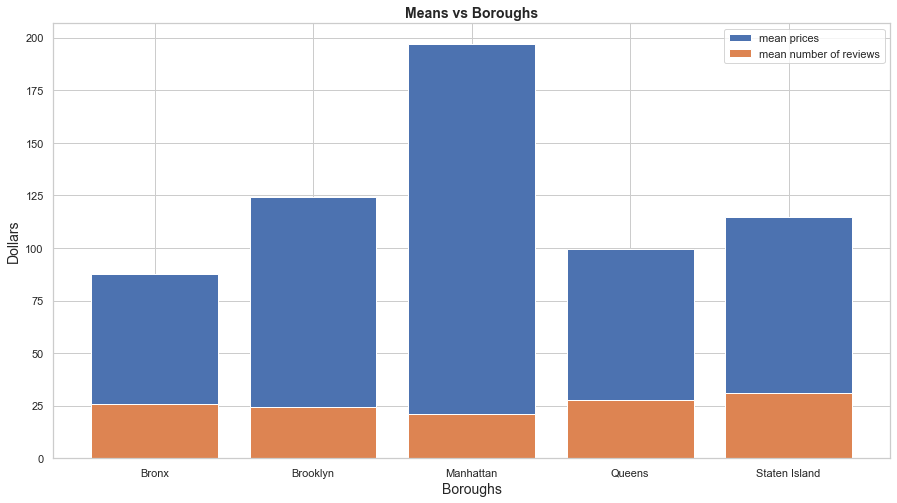

In [19]:
# Create a dataframe that groups the data by borough and then calculates the mean for each of the other columns
x = (data.groupby('neighbourhood_group').mean())
plt.figure(figsize= (15, 8))

# Creating the prices bar in blue
plt.bar(x.index, x['price'], label = 'mean prices')

# Creating the number of reviews bar in orange
plt.bar(x.index, x['number_of_reviews'], label = 'mean number of reviews')
plt.legend()
plt.title("Means vs Boroughs", weight='bold').set_fontsize('14')
plt.xlabel("Boroughs", weight='book').set_fontsize('14')
plt.ylabel("Dollars", weight='book').set_fontsize('14')
plt.show()

This bar graph shows us concretes the data we found from the boxplots and leads to an interesting observation regarding the relationship between the two variables. For the former, we can solidify the fact that the average price for an Airbnb is the highest in Manhattan, while the cheaper airbnb's can be found in Bronx. But an interesting observation this bar graph shows is how the mean number of reviews is stagnent across all the boroughs, almost implying that the number of reviews has nothing to do with the pricing of an Airbnb.

In order to fully prove our observation from the bar graph above asserting that there is no correlation between price and the number of reviews, let's create a correlation matrix and a scatter plot of the two variables and examine them to draw some conclusions. 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


                      price  number_of_reviews
price              1.000000          -0.047963
number_of_reviews -0.047963           1.000000


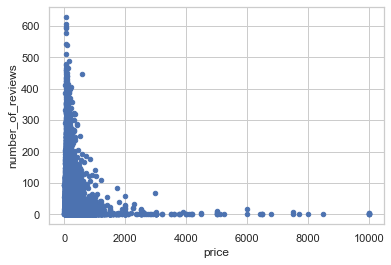

In [21]:
print(data[["price", "number_of_reviews"]].corr())
data.plot.scatter(x='price', y='number_of_reviews')

According to the correlation matrix and the scatter plot, it seems our assumption is correct in implying that there is no correlation between price and the number of reviews. From the correlation matrix, we can see that the correlation between price and the number of reviews is -0.04, which indicates no correlation between the two variables since the value is so close to 0. Furthermore, the scatter plot is very haphazard in nature and shows no patterns within it as well. 

<i>Through this analysis we are able to assert that there is <b>no correlation</b> between price and the number of reviews. Or in other words, the number of reviews does not dictate the price of an airbnb.</i>

<a id=3.5></a>
### 3.5 Most Popular Neighbourhoods Analysis
Now lets say just for fun you wanted to figure out which is the most popular neighbourhood within each borough. Why? Well if you put yourself into the shoes of someone trying to find a safe, affordable and nice Airbnb, you would expect it to be in a neighbourhood with a high density of them. So this next part shows the Top 10 most listed Airbnb's for each neighbourhood within each borough.

In [22]:
# Create a table for each borough and populate it with the neighbourhood as the key and the amount of listings 
# as the value. What defaultdict does for us is initialize the tables for us so that we don't have to worry 
# about that extraneous code. 
manhattan, bronx, queens, staten_island, brooklyn, overall = defaultdict(int), defaultdict(int), defaultdict(int), defaultdict(int),defaultdict(int), defaultdict(int)

for idx, row in df_manhattan.iterrows():
    manhattan[row['neighbourhood']] += 1
for idx, row in df_bronx.iterrows():
    bronx[row['neighbourhood']] += 1
for idx, row in df_queens.iterrows():
    queens[row['neighbourhood']] += 1
for idx, row in df_staten_island.iterrows():
    staten_island[row['neighbourhood']] += 1
for idx, row in df_brooklyn.iterrows():
    brooklyn[row['neighbourhood']] += 1
for idx, row in data.iterrows():
    overall[row['neighbourhood']] += 1
manhattan = dict(Counter(manhattan).most_common(10))
bronx = dict(Counter(bronx).most_common(10))
queens = dict(Counter(queens).most_common(10))
staten_island = dict(Counter(staten_island).most_common(10))
brooklyn = dict(Counter(brooklyn).most_common(10))
overall = dict(Counter(overall).most_common(10))

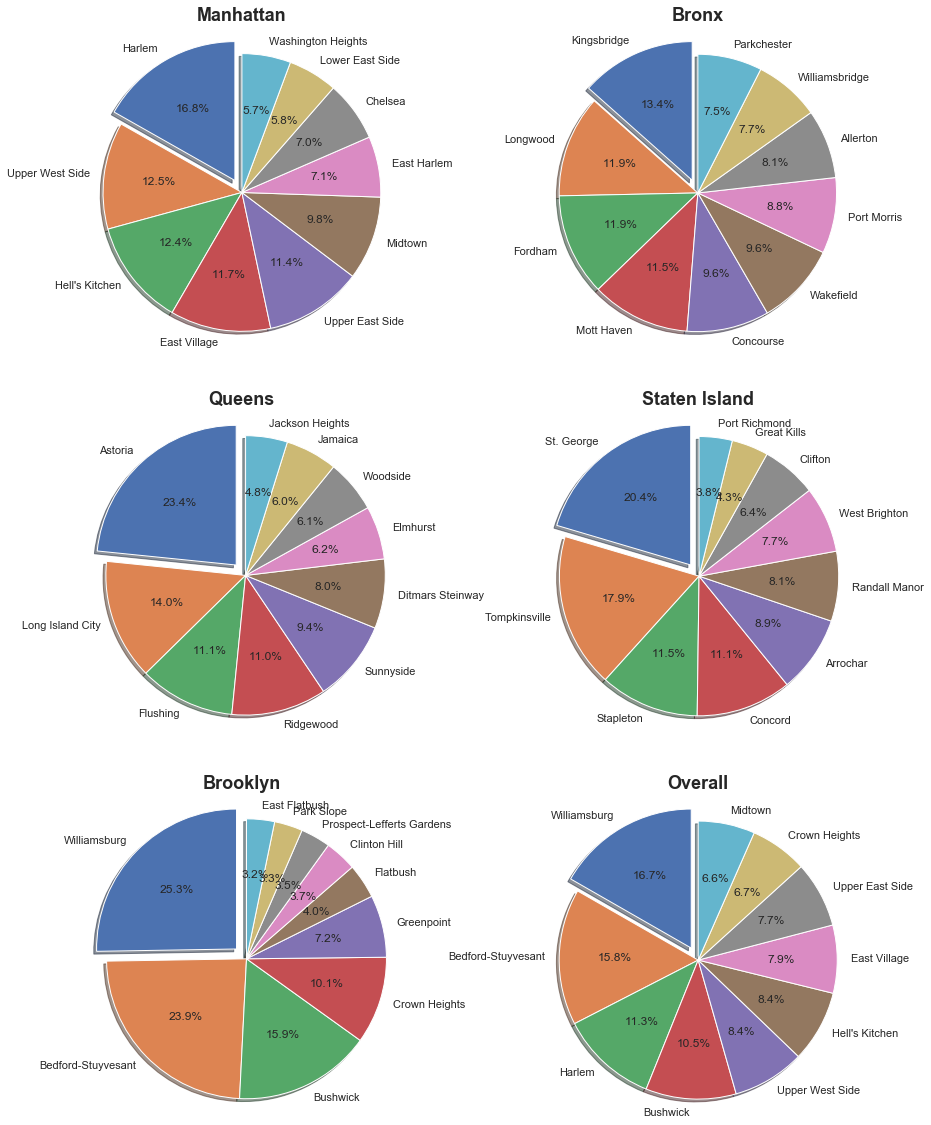

In [23]:
# Now we create each respective pie chart
#Manhattan
explode = (0.1, 0, 0, 0, 0, 0, 0, 0, 0, 0)  # only "explode" the 1st slice 
fig, ax = plt.subplots(3, 2, figsize=(15,20)) # create 2x3 matrix of pies
ax[0,0].pie(manhattan.values(), explode= explode, labels=manhattan.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,0].set_title('Manhattan', weight='bold').set_fontsize('18')

#Bronx
ax[0,1].pie(bronx.values(), explode= explode, labels=bronx.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[0,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[0,1].set_title('Bronx', weight='bold').set_fontsize('18')


#Queens
ax[1,0].pie(queens.values(), explode= explode, labels=queens.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,0].set_title('Queens', weight='bold').set_fontsize('18')

#Staten Island
ax[1,1].pie(staten_island.values(), explode= explode, labels=staten_island.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[1,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[1,1].set_title('Staten Island', weight='bold').set_fontsize('18')

#Brooklyn
ax[2,0].pie(brooklyn.values(), explode= explode, labels=brooklyn.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2,0].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[2,0].set_title('Brooklyn', weight='bold').set_fontsize('18')

#Overall
ax[2,1].pie(overall.values(), explode= explode, labels=overall.keys(), autopct='%1.1f%%',
        shadow=True, startangle=90)
ax[2,1].axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax[2,1].set_title('Overall', weight='bold').set_fontsize('18')
plt.show()

<a id=3.6></a>
### 3.6 Exploratory Data Analysis Conclusions
Data visualization and analysis allows the user/reader to understand the data in a simple and insightful way. Through our analysis, we are able to show the reader a visualization of where all the listings are in NYC and allow them to interactively determine where high density and low density spots of listings are. Furthermore, we took a deep dive into one variable of the dataframe and were able to assert through bar graphs, scatter plots, density plots, and correlation matrices, that there is no correlation between the number of reviews and the price. We finally created a visually appealing matrix of pies to allow the reader to see which neighbourhoods are booked the most and better inform their decisions and opinions. 

Through data visualization, we try to abstract the code and make the data as easy to understand as possible. And this can be done through visually appealing plots and graphs. If you are using matrices or math to describe your conclusion, be sure to thoroughly describe what all the variables mean and the significance of them. 

<a id=4></a>
## 4. Hypothesis Testing
As we can see in this dataset, Airbnb locations are distributed throughout different boroughs. An interesting comparison that we could test is whether the price in one location is greater than another location. Specifically, whether the price of a location in Brooklyn is higher on average than in Manhattan. 

<a id=4.1></a>
### 4.1 Null v. Alternative Hypothesis
So to state the null hypothesis, we expect that the price in one borough, should be the same as the price in another borough: the borough the listing is located in should not affect its price. Our alternative hypothesis would be that in fact, the prices are different based on the borough it is located in. 


First let's extract the data from Brooklyn and the Manhattan areas. 

In [42]:
brooklyn_data = data[data['neighbourhood_group'] == 'Brooklyn']
manhattan_data = data[data['neighbourhood_group'] == 'Manhattan']

We can now randomly sample 30 locations from each borough. 

In [43]:
brooklyn_sample = brooklyn_data.sample(n=30, random_state=1)
manhattan_sample = manhattan_data.sample(n=30, random_state=1)

Let's extract the data for each borough into a single table. First, we need to get the mean and standard deviation of each sample. 

In [48]:
brooklyn_sample_mean = np.mean(brooklyn_sample['price'])
manhattan_sample_mean = np.mean(manhattan_sample['price'])

print('Brooklyn: Mean: {}'.format(brooklyn_sample_mean))
print('Manhattan: Mean: {}'.format(manhattan_sample_mean))

Brooklyn: Mean: 138.23333333333332
Manhattan: Mean: 177.43333333333334


We now define a random variable $Y = \bar{X_{m}} - \bar{X_{b}}$, where m represents Manhattan and b represents Brooklyn. With assumption that the prices are the same, our expected value for the difference is 0, while the variance is the sum of the variances. 

We thus need to get an estimate of average price for both boroughs for an approximation. We can do this by assuming that all observations from this experiment can be treated as i.i.d draws. Thus we would estimate the mean and variance of $Y$ as shown below. 

In [45]:
approx_y_bar = np.mean(pd.concat([brooklyn_sample, manhattan_sample])['price'])
approx_y_var = np.var(pd.concat([brooklyn_sample, manhattan_sample])['price'])
print('Approx: Mean: {}, Variance: {}'.format(approx_y_bar, approx_y_var))

Approx: Mean: 157.83333333333334, Variance: 16699.305555555555


The estimate $\hat{y}$ based on the data we recorded is approximately 39.2 (177.433 - 138.233). Thus we can now use CLT approximation to determine $P(Y \neq \hat{y})$. 

In [49]:
import scipy.stats as stats 

mu = 0
sigma = np.sqrt(approx_y_var)

stats.norm(mu, sigma).cdf(39.2)

0.6191865276103267

<a id=4.2></a>
### 4.2 Hypothesis Testing Conclusions
It can be seen that we fail to reject the hypothesis that the prices are the same, since the probability we computed (.619) is greater than 0.05, which is the standard alpha value. 

We can plot the normal distribution based on our mean and standard deviation to validate this. The plot below shows that this makes sense as the standard deviation is quite large.  

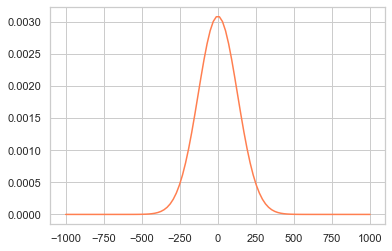

In [50]:
x = np.linspace(-1000, 1000, 100)

y = stats.norm.pdf(x,mu,sigma)

plt.plot(x,y, color='coral')

<a id=5></a>
## 5. Machine Learning: Can we predict the price based on the given data? 

<a id=5.1></a>
### 5.1 Imports

In [24]:
import sklearn 

# Data Prep 
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Text Extraction for Name 
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, HashingVectorizer
from sklearn.decomposition import PCA

# ML Models 
from sklearn.linear_model import LinearRegression, ElasticNet, Ridge, Lasso 

# Metrics 
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_absolute_error, mean_squared_error

`sklearn` is the main library we will use for machine learning. It is a very popular Python library that provides efficient tools for machine learning and analysis. Below is how to download the library.

1. <a href='https://scikit-learn.org/stable/'>scikit-learn</a> 
    * pip install -U scikit-learn

<a id=5.2></a>
### 5.2 Data Preparation
The goal is to determine the price of an Airbnb listing based on the given data. In [Section 2](#2) we removed the ids as they contain no useful information about the location and we also removed the host's name since there may be added bias that is not relevant to the problem.

We continue to include the name information to see if we can apply feature extraction methods and we removed any of the rows that are missing this information also in [Section 2](#2). However they did not prove to be too useful as you can see later. 

In [25]:
ml_data = data
ml_data.head()

name neighbourhood_group  \
0                Clean & quiet apt home by the park            Brooklyn   
1                             Skylit Midtown Castle           Manhattan   
2               THE VILLAGE OF HARLEM....NEW YORK !           Manhattan   
3                   Cozy Entire Floor of Brownstone            Brooklyn   
4  Entire Apt: Spacious Studio/Loft by central park           Manhattan   

  neighbourhood  latitude  longitude        room_type  price  minimum_nights  \
0    Kensington  40.64749  -73.97237     Private room    149               1   
1       Midtown  40.75362  -73.98377  Entire home/apt    225               1   
2        Harlem  40.80902  -73.94190     Private room    150               3   
3  Clinton Hill  40.68514  -73.95976  Entire home/apt     89               1   
4   East Harlem  40.79851  -73.94399  Entire home/apt     80              10   

   number_of_reviews  reviews_per_month  calculated_host_listings_count  \
0                  9               0.21                               6   
1                 45               0.38                               2   
2                  0                NaN                               1   
3                270               4.64                               1   
4                  9               0.10                               1   

   availability_365  days_since_last_review  
0               365                   576.0  
1               355                   362.0  
2               365                     NaN  
3               194                   317.0  
4                 0                   545.0

<a id=5.3></a>
### 5.3 Distribution of Listing Prices
For regression, there is a central assumption that the attribute being regressed has a normal distribution. Let's see if that is the case, by plotting the distribution of prices. 

Text(0.5, 1.0, 'Distribution of Price')

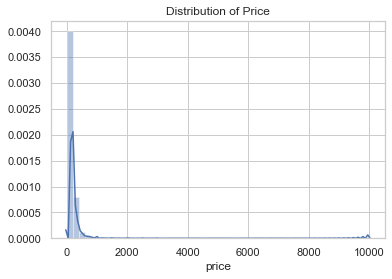

In [26]:
# Plot distribution of price 
sns.distplot(ml_data['price'])
plt.title('Distribution of Price')

We can see that the distribution is skewed positively. This is problematic for our regression, so we can aim to solve this problem by performing the log operation to obtain a normal distribution. Additionally, since the log operation is defined at 0, we add 1 to our price prior to performing the log, so that we avoid any `NaN` errors. 

Text(0.5, 1.0, 'Distribution of Log Price')

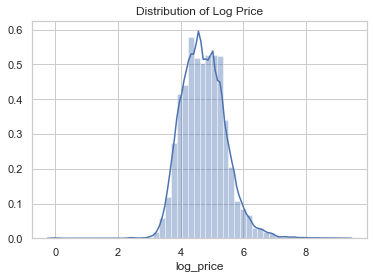

In [27]:
# Calculate the log price 
ml_data['log_price'] = np.log(ml_data['price'] + 1)

# Plot the new distribution 
sns.distplot(ml_data['log_price'])
plt.title('Distribution of Log Price')

It can be seen that this feature has a much more normal distribution and thus is ready for regression. 

<a id=5.4></a>
### 5.4 Data Processing
In this section we want to process our data which includes steps like splitting the data into a training and testing set so that we can fit a model to our data.

The next thing we want to do is split the data into X and y. Remember that the y is now the log of the price not the price itself. 

In [28]:
X = ml_data.drop(['price', 'log_price'], axis=1)
y = ml_data[['log_price']]

In order to obtain features for the names, we apply the <a href='https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html'>TfIdf</a> vectorizer on the `name` column and then apply <a href='https://towardsdatascience.com/pca-using-python-scikit-learn-e653f8989e60'>PCA</a> to reduce the dimensions. This gets us a word frequency vector, and by applying PCA the goal would be to obtain the most important features that capture the variance of the data.  

In [29]:
# Obtain feature vectors 
v = TfidfVectorizer()
namesVect = v.fit_transform(X['name']).toarray()

# Scale the data before PCA 
scale = StandardScaler()
namesVect = scale.fit_transform(namesVect)

In [30]:
# Apply PCA 
pca = PCA(n_components=10)
namesVect_pca = pca.fit_transform(namesVect)
namesVect_pca

array([[-0.00911691,  0.01405955, -0.01750134, ..., -0.02486284,
         0.01572685,  0.04875125],
       [-0.00502632, -0.00240731,  0.00278199, ..., -0.00306455,
        -0.00447231,  0.00649933],
       [-0.02231244,  0.00381613, -0.03143416, ..., -0.08767689,
         0.04741042, -0.02354614],
       ...,
       [-0.01043021, -0.01288023, -0.02616375, ..., -0.02248282,
        -0.00799146, -0.02000944],
       [-0.00822665, -0.07016098, -0.02075503, ...,  0.0397836 ,
        -0.0700644 ,  0.03967417],
       [-0.02734382,  0.00422227, -0.03565706, ..., -0.04420132,
         0.0062958 , -0.05232408]])

In [31]:
pca.explained_variance_ratio_

array([0.00079935, 0.00063603, 0.00063066, 0.00062003, 0.00061617,
       0.00061499, 0.00061053, 0.00060859, 0.00059386, 0.00055311])

Looking at the PCA explained variance ratio, we can examine how much of the variance each of the components captures. It can be seen that since so little the variance is captured in the first 10 components, this kind of analysis will not provide to be too useful in predicting price. Therefore, we do not include this in our model. 

Next, we split the data into training and testing with 80% of the data in the training set and 20% of it in the testing set. 

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

We now build a <a href='https://scikit-learn.org/stable/modules/compose.html'>pipeline</a> for processing our data. 

The pipeline consists of first selecting the relevant columns of the data that we want to feed into our model. We then scale our inputs for numerical data nad then perform imputation by replacing the missing values with the mean. For categorical data, we impute using the most common data and then encode our values into numerical data that can be passed into the regression model using <a href='https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html'>one-hot encoding</a>. We can then combine all our data from these different pipelines using `sklearn's` <a href='https://scikit-learn.org/stable/modules/generated/sklearn.pipeline.FeatureUnion.html'>FeatureUnion</a> class.

In [33]:
# Transformation will select numerical or categorical columns automatically 

from sklearn.base import BaseEstimator, TransformerMixin

# Create a class to select numerical or categorical columns 
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names].values

In [34]:
# Select the relevant numerical columns 
num_cols = ['latitude', 'longitude', 'minimum_nights', 'number_of_reviews',
            'reviews_per_month', 'calculated_host_listings_count', 
            'availability_365', 'days_since_last_review']
            
# Select relevant categorical columns 
cat_cols = ['neighbourhood_group', 'room_type']

# Pipeline for handling numerical data: select, impute, scale 
num_pipeline = Pipeline([
        ('selector', DataFrameSelector(num_cols)),
        ('imputer', SimpleImputer(strategy="mean")),
        ('scaler', StandardScaler())
    ])

# Pipeline for handling categorical data: select, impute, encode 
cat_pipeline = Pipeline([
        ('selector', DataFrameSelector(cat_cols)), 
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('one-hot', OneHotEncoder())
    ])

In [35]:
# Combine pipelines to get final pipeline for all data 
full_pipeline = FeatureUnion(transformer_list=[
        ("num_pipeline", num_pipeline),
        ("cat_pipeline", cat_pipeline),
    ])

Now, we use the pipeline to fit to and transform the training data, and then transform the test data. It is very important that we only transform the test data and not fit on it. This is so the test data does not leak into the training data and we maintain the test set as a viable evaluation of our model.

In [36]:
X_train_prepared = full_pipeline.fit_transform(X_train)
X_train_prepared.shape

(39103, 16)

X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared.shape

In [37]:
X_test_prepared = full_pipeline.transform(X_test)
X_test_prepared.shape

(9776, 16)

We now have our processed data and are ready to fit a model to our data! There are a variety of different regression models, but we will specifically look at linear models such as Linear Regression. Additionally, we will look into using different variations that add regularization such as Ridge and Lasso as well as ElasticNet.  

If you would like to learn more about these kinds of models, here are a few links to look at: 

* <a href='https://www.datacamp.com/community/tutorials/tutorial-ridge-lasso-elastic-net'>Datacamp Tutorial on Ridge, Lasso and Elastic-Net</a> 
* <a href='https://towardsdatascience.com/bias-variance-and-regularization-in-linear-regression-lasso-ridge-and-elastic-net-8bf81991d0c5'>Towards Data Science Article about Regularization for Linear Regression</a>

<a id=5.5></a>
### 5.5 Machine Learning Models
First, let's build a Linear Regression model using the default parameters. 

In [39]:
# Build model and fit with training data 
lin_reg = LinearRegression()
lin_reg.fit(X_train_prepared, y_train)

# Use model to get predictions on testing set 
y_preds = lin_reg.predict(X_test_prepared)

print('Mean Absolute Error: ', mean_absolute_error(y_test, y_preds))
print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_preds)))

Mean Absolute Error:  0.35574722355154875
Root Mean Squared Error:  0.4965957401982544


We can now take this code and turn it into a function, allowing us to test out a variety of different models. 

In [40]:
# Train and evaluate a given model, returns the trained model 

def train_and_evaluate_model(model): 
    model.fit(X_train_prepared, y_train)
    y_preds = model.predict(X_test_prepared)
    print('Mean Absolute Error: ', mean_absolute_error(y_test, y_preds))
    print('Root Mean Squared Error: ', np.sqrt(mean_squared_error(y_test, y_preds)))
    return model 

Let's take a look at the performance for Ridge, Lasso and Elastic-Net Regression. 

In [41]:
print('Ridge Scores: ')
ridge = train_and_evaluate_model(Ridge())
print('\nLasso Scores: ')
lasso = train_and_evaluate_model(Lasso())
print('\nElastic Net Scores: ')
elastic = train_and_evaluate_model(ElasticNet())

Ridge Scores: 
Mean Absolute Error:  0.3557477272599804
Root Mean Squared Error:  0.49659982922837986

Lasso Scores: 
Mean Absolute Error:  0.5504264801484526
Root Mean Squared Error:  0.6973808774083553

Elastic Net Scores: 
Mean Absolute Error:  0.5504264801484526
Root Mean Squared Error:  0.6973808774083553


We can see that the Ridge and plain Linear Regression models perform the best, with the lowest mean absolute error and root mean squared error. The reason for this could be that the regularization parameters for the latter two models were too high. In order to improve on these results, you can look into a lot of different things like <a href='https://scikit-learn.org/stable/modules/cross_validation.html'>cross-validation</a> as well as <a href='https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html'>grid-search</a> for finding the best hyperparamters to tune your model. Additionally, you can look into other types of regression models like SVMs and Random Forests. 

This <a href='https://towardsdatascience.com/which-machine-learning-model-to-use-db5fdf37f3dd'>link</a> can give you a better idea of what model might suit your needs the best.  

<a id=6></a>
## 6. Conclusion
In this tutorial we went over the main steps of a data science pipline:
    1. Data Curation, Parsing, and Management
    2. Exploratory Data Analysis
    3. Hypothesis Testing and Machine Learning
We applied the data science pipeline to our specific study of the Airbnb listings in New York City in 2019. However these steps can be generalized to any kind of data or problem that you may be interested in.

Data science is a very powerful tool that has changed the way that we understand people, businesses, and society. We can understand trends and patterns from the past and even extrapolate them to predict the future. Data science has given us a scientific and objective lense that provides insight into the world around us through data.